### Import required modules

In [50]:
from scipy.stats import mannwhitneyu
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import statistics

### Get the results csv file and convert it to a dataframe

In [2]:
data = '../results/accuracy_results.csv'

In [3]:
data_df = pd.read_csv(data, sep=',')

In [4]:
data_df.shape

(1560, 3)

### Create a new dataframes for each size and domain group

In [5]:
big_df = data_df[data_df['Predictor'].str.contains("BB|LB|UB|MB", regex=True)]
small_df = data_df[data_df['Predictor'].str.contains("BS|LS|US|MS", regex=True)]
business_df = data_df[data_df['Predictor'].str.contains("BB|BS", regex=True)]
library_df = data_df[data_df['Predictor'].str.contains("LB|LS", regex=True)]
utility_df = data_df[data_df['Predictor'].str.contains("UB|US", regex=True)]
multimedia_df = data_df[data_df['Predictor'].str.contains("MB|MS", regex=True)]

In [6]:
big_df.shape, small_df.shape, business_df.shape, library_df.shape, utility_df.shape, multimedia_df.shape

((780, 3), (780, 3), (390, 3), (390, 3), (390, 3), (390, 3))

### Get the accuracy column of each dataframe

In [7]:
big_acc = big_df[['Accuracy']]
small_acc = small_df[['Accuracy']]
business_acc = business_df[['Accuracy']]
library_acc = library_df[['Accuracy']]
utility_acc = utility_df[['Accuracy']]
multimedia_acc = multimedia_df[['Accuracy']]

In [8]:
big_acc.shape, small_acc.shape, business_acc.shape, library_acc.shape, utility_acc.shape, multimedia_acc.shape

((780, 1), (780, 1), (390, 1), (390, 1), (390, 1), (390, 1))

### Convert the accuracy values into NumPy arrays, then into lists

In [9]:
big_arr = np.array(big_acc, dtype = 'float32').ravel()
small_arr = np.array(small_acc, dtype = 'float32').ravel()
business_arr = np.array(business_acc, dtype = 'float32').ravel()
library_arr = np.array(library_acc, dtype = 'float32').ravel()
utility_arr = np.array(utility_acc, dtype = 'float32').ravel()
multimedia_arr = np.array(multimedia_acc, dtype = 'float32').ravel()

In [10]:
big_arr.shape, small_arr.shape, business_arr.shape, library_arr.shape, utility_arr.shape, multimedia_arr.shape

((780,), (780,), (390,), (390,), (390,), (390,))

### Final lists to be tested

In [11]:
big = big_arr.tolist()
small = small_arr.tolist()
business = business_arr.tolist()
library = library_arr.tolist()
utility = utility_arr.tolist()
multimedia = multimedia_arr.tolist()

### Mean values of each domain and size group

In [58]:
print("The mean value of Big size projects accuracy results is:", statistics.mean(big))
print("The mean value of Small size projects accuracy results is:", statistics.mean(small), "\n")
print("The mean value of Business domain projects accuracy results is:", statistics.mean(business))
print("The mean value of Library domain projects accuracy results is:", statistics.mean(library))
print("The mean value of Utility domain projects accuracy results is:", statistics.mean(utility))
print("The mean value of Multimedia domain projects accuracy results is:", statistics.mean(multimedia))

The mean value of Big size projects accuracy results is: 0.5483769575910021
The mean value of Small size projects accuracy results is: 0.5347866121178063 

The mean value of Business domain projects accuracy results is: 0.5506174123726594
The mean value of Library domain projects accuracy results is: 0.527567394849104
The mean value of Utility domain projects accuracy results is: 0.5340427962537759
The mean value of Multimedia domain projects accuracy results is: 0.5540995359420776


### Convert each list to dataframe for plotting purposes

In [12]:
big_plot = pd.DataFrame(big)
small_plot = pd.DataFrame(small)
business_plot = pd.DataFrame(business)
library_plot = pd.DataFrame(library)
utility_plot = pd.DataFrame(utility)
multimedia_plot = pd.DataFrame(multimedia)

### Perform Mann-Whitney U test between the Big and Small lists

In [13]:
result = mannwhitneyu(big, small)

In [15]:
print("The P-value of the statistical significance test between predictions of big projects and other of small projects is:", result.pvalue, "\n")

The P-value of the statistical significance test between predictions of big projects and other of small projects is: 0.0474892730703384 



### Plot the results for the Big Vs Small data comparison

In [33]:
big_vs_small = big_plot.join(small_plot, lsuffix='big', rsuffix='small')

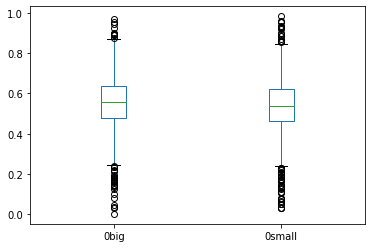

In [40]:
big_vs_small.boxplot(column=['0big', '0small'], grid=False)
plt.show()

### Perform Mann-Whitney U test for all possible pair combinations among domains lists

In [22]:
domains = [business, library, utility, multimedia] # Include all lists in this parent list to iterate through it
domains_names = ["Business", "Library", "Utility", "Multimedia"] # List of strings that holds the names. MUST BE IN THE SAME ORDER
domains_plots = [business_plot, library_plot, utility_plot, multimedia_plot] # Include all dataframes in this list. MUST BE IN THE SAME ORDER

In [23]:
nr_domains = []
for i in range(len(domains)):
    nr_domains.append(i) 

In [32]:
pairs = list(itertools.combinations(nr_domains, 2))
for i in range(len(pairs)):
    result = mannwhitneyu(domains[pairs[i][0]], domains[pairs[i][1]])
    print("The P-value of the statistical significance test between",domains_names[pairs[i][0]], "and", domains_names[pairs[i][1]],"is:", result.pvalue, "\n") 
    

The P-value of the statistical significance test between Business and Library is: 0.026750032782123557 

The P-value of the statistical significance test between Business and Utility is: 0.03491805236802343 

The P-value of the statistical significance test between Business and Multimedia is: 0.9476701868119938 

The P-value of the statistical significance test between Library and Utility is: 0.8828824311088987 

The P-value of the statistical significance test between Library and Multimedia is: 0.02360752592720595 

The P-value of the statistical significance test between Utility and Multimedia is: 0.030637400728111643 



### Plot the results for all possible pair combinations among domains data

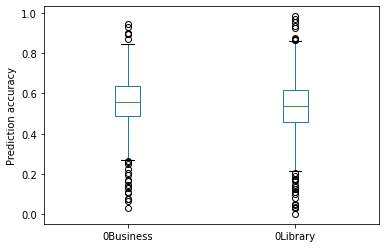

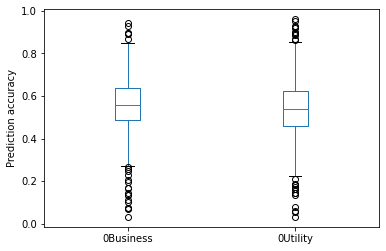

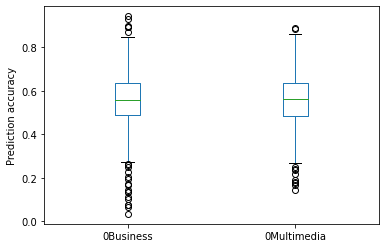

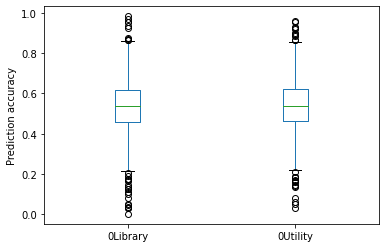

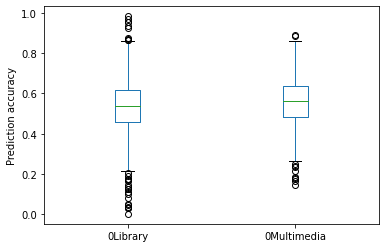

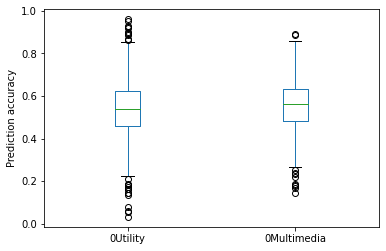

In [31]:
for i in range(len(pairs)):
    combined_df = domains_plots[pairs[i][0]].join(domains_plots[pairs[i][1]], lsuffix=domains_names[pairs[i][0]], rsuffix=domains_names[pairs[i][1]])
    pb = combined_df.boxplot(column=['0' + domains_names[pairs[i][0]], '0' + domains_names[pairs[i][1]]], grid=False)
    pb.set_ylabel('Prediction accuracy')
    plt.show()